In [2]:
from fears.population import Population
from fears.utils import plotter
import matplotlib.pyplot as plt

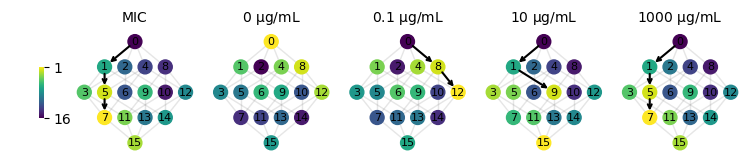

In [50]:
p = Population(fitness_data='from_file')

fig,ax_list = plt.subplots(ncols=5,figsize=(8.5,5))

arrowprops = dict(arrowstyle='->', color='black', lw=1.5,mutation_scale=7,shrinkA=5,shrinkB=5)

gen_list = [0]
indx =0
isMaximum = False

while not isMaximum:
    neighbors = p.gen_neighbors(gen_list[indx])
    fitness = p.ic50
    fitness_neighbors = [fitness[i] for i in neighbors]
    cur_fitness = fitness[gen_list[indx]]

    if max(fitness_neighbors) > cur_fitness:
        gen_list.append(neighbors[fitness_neighbors.index(max(fitness_neighbors))])
        indx += 1
    else:
        isMaximum = True

ax = ax_list[0]

plotter.plot_landscape(p,trajectory=gen_list,ax=ax,node_size=100,
                       square=True,node_label='base10',arrowprops=arrowprops,
                       resize_param=0.01,fit_land=p.ic50,edge_alpha=0.1,textsize=8,colorbar=True,
                       cbloc = [-0.6,0.25,0.3,0.5],cblabel='')

ax.set_title('MIC',pad=10,fontsize=10)

for i,conc in enumerate([0,10**-1,10,10**3]):

    ax = ax_list[i+1]

    gen_list = [0]
    indx =0
    isMaximum = False

    while not isMaximum:
        neighbors = p.gen_neighbors(gen_list[indx])
        fitness = p.gen_fit_land(conc=conc)
        fitness_neighbors = [fitness[i] for i in neighbors]
        cur_fitness = fitness[gen_list[indx]]

        if max(fitness_neighbors) > cur_fitness:
            gen_list.append(neighbors[fitness_neighbors.index(max(fitness_neighbors))])
            indx += 1
        else:
            isMaximum = True

    plotter.plot_landscape(p,conc=conc,trajectory=gen_list,colorbar=False,ax=ax,
                           node_size=100,square=True,node_label='base10',
                           arrowprops=arrowprops,resize_param=0.01,edge_alpha=0.1,textsize=8)
    
    ax.set_title(str(conc) + ' $\mathrm{\mu}$g/mL',pad=10,fontsize=10)

fig.savefig('../figures/trajectory_analysis.pdf',bbox_inches='tight')

In [14]:
gen_list

[0]

<AxesSubplot:>

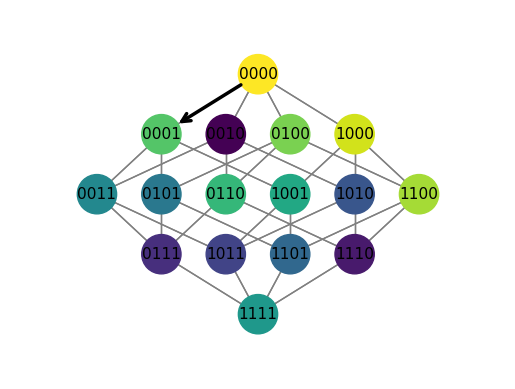